In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense


### classification with binary problem [0, 1]

In [3]:
X = np.load("X.npy")[:1000]
y = np.load("y.npy")[:1000]

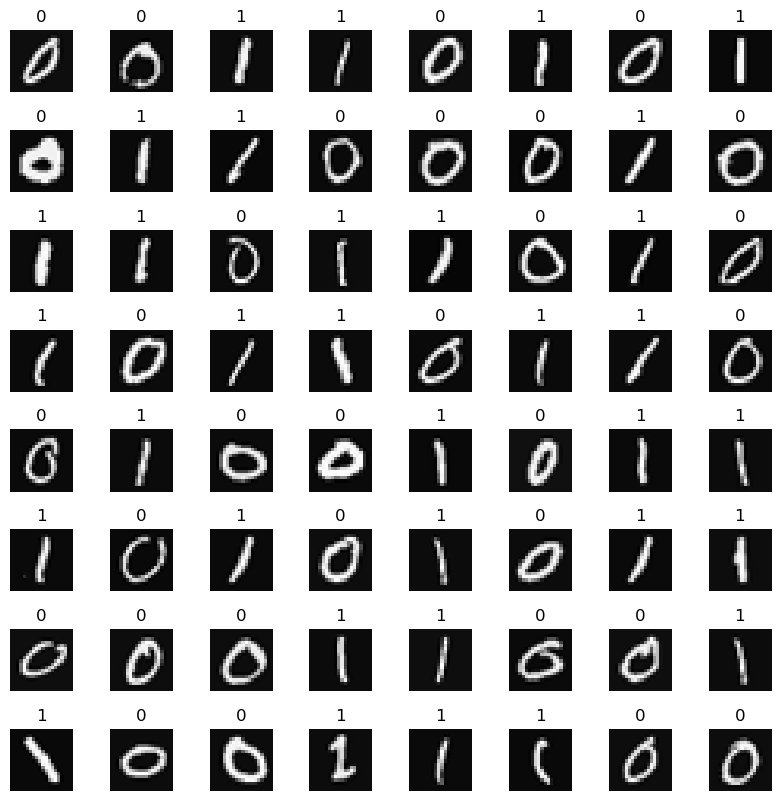

In [4]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [29]:
model = Sequential([
    tf.keras.Input(shape=(400,)),    #specify input size
    Dense(25, activation = "relu", name = "layer1"),
    Dense(15, activation = "relu", name = "layer2"),
    Dense(1, activation = "sigmoid", name = "layer3")
]
)

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                10025     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [31]:

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.legacy.Adam(0.001))
model.fit(X_train, y_train,
          epochs = 20)

Epoch 1/20
24/24 [==============================] - 0s 848us/step - loss: 0.4196
Epoch 2/20
24/24 [==============================] - 0s 859us/step - loss: 0.1360
Epoch 3/20
24/24 [==============================] - 0s 840us/step - loss: 0.0455
Epoch 4/20
24/24 [==============================] - 0s 743us/step - loss: 0.0235
Epoch 5/20
24/24 [==============================] - 0s 748us/step - loss: 0.0158
Epoch 6/20
24/24 [==============================] - 0s 747us/step - loss: 0.0126
Epoch 7/20
24/24 [==============================] - 0s 752us/step - loss: 0.0098
Epoch 8/20
24/24 [==============================] - 0s 756us/step - loss: 0.0085
Epoch 9/20
24/24 [==============================] - 0s 754us/step - loss: 0.0066
Epoch 10/20
24/24 [==============================] - 0s 771us/step - loss: 0.0053
Epoch 11/20
24/24 [==============================] - 0s 795us/step - loss: 0.0045
Epoch 12/20
24/24 [==============================] - 0s 833us/step - loss: 0.0038
Epoch 13/20
24/24 [======

In [33]:
prediction = model.predict(X_test)

## logistic
result = prediction > 0.5

8/8 [==============================] - 0s 2ms/step


In [34]:
print(f"Accuracy_score : {accuracy_score(result, y_test)}")

Accuracy_score : 1.0


In [35]:
## check weight
[layer1, layer2, layer3] = model.layers

In [36]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [37]:
print(f"W1_1 weight : {W1[0]},\n b1_1 weight : {b1[0]}")
print(f"W2_1 weight : {W2[0]},\n b2_1 weight : {b2[0]}")
print(f"W3_1 weight : {W3[0]},\n b3_1 weight : {b3[0]}")

W1_1 weight : [ 0.07522739  0.08532912  0.05477379  0.02204277  0.06451268  0.11728726
 -0.05149813  0.02692686 -0.01012909  0.04010707 -0.11877983  0.07727684
 -0.03272108  0.07937793 -0.06161348 -0.06008182 -0.06258641 -0.09366539
 -0.10025558 -0.08305529  0.01428466  0.0170292   0.06672171  0.08308232
 -0.09773166],
 b1_1 weight : 0.11035927385091782
W2_1 weight : [-0.01185502 -0.04912942  0.32355663  0.28499386  0.03379161  0.18100381
  0.10793734  0.28035703 -0.0225068   0.19814709  0.2802632  -0.15604302
  0.26628292  0.00666217  0.02458972],
 b2_1 weight : -0.0032716651912778616
W3_1 weight : [-0.42757496],
 b3_1 weight : 0.06522846966981888


### Classification with multiclass problem [0 ~ 9]

In [76]:
X = np.load("X.npy")
y = np.load("y.npy")

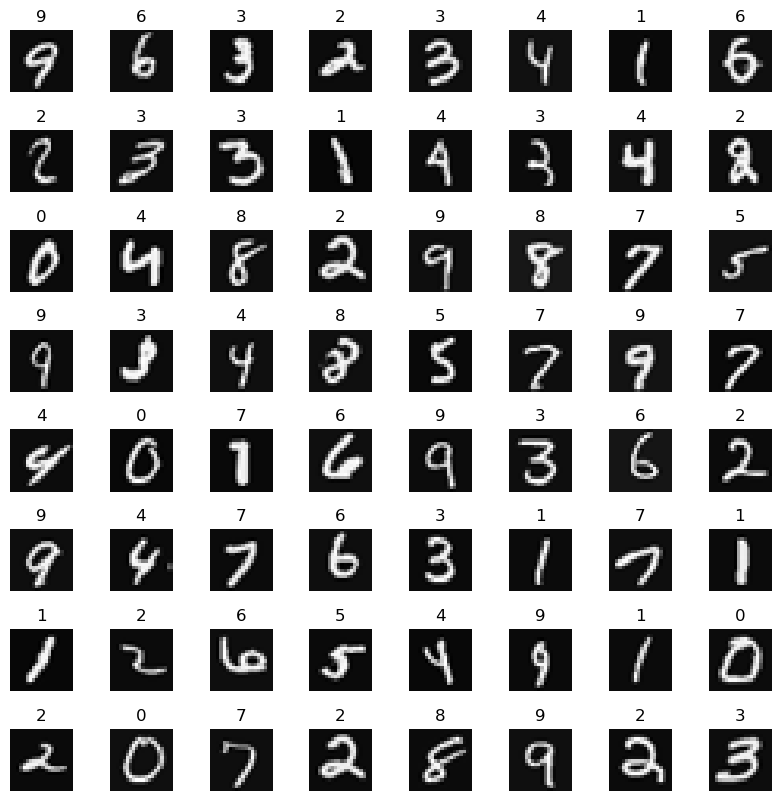

In [77]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [126]:
model = Sequential([
    tf.keras.Input(shape=(400,)),    #specify input size
    Dense(25, activation = "relu", name = "layer1"),
    Dense(15, activation = "relu", name = "layer2"),
    Dense(10, activation = "softmax", name = "layer3")
]
)

In [127]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                10025     
                                                                 
 layer3 (Dense)              (None, 10)                260       
                                                                 
Total params: 10,285
Trainable params: 10,285
Non-trainable params: 0
_________________________________________________________________


In [128]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.legacy.Adam(0.001))

In [132]:
model.fit(X, y,
          epochs = 30)

Epoch 1/30
157/157 [==============================] - 0s 761us/step - loss: 0.0033
Epoch 2/30
157/157 [==============================] - 0s 815us/step - loss: 0.0031
Epoch 3/30
157/157 [==============================] - 0s 855us/step - loss: 0.0029
Epoch 4/30
157/157 [==============================] - 0s 740us/step - loss: 0.0027
Epoch 5/30
157/157 [==============================] - 0s 846us/step - loss: 0.0025
Epoch 6/30
157/157 [==============================] - 0s 820us/step - loss: 0.0023
Epoch 7/30
157/157 [==============================] - 0s 947us/step - loss: 0.0023
Epoch 8/30
157/157 [==============================] - 0s 869us/step - loss: 0.0021
Epoch 9/30
157/157 [==============================] - 0s 950us/step - loss: 0.0021
Epoch 10/30
157/157 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 11/30
157/157 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 12/30
157/157 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 1

In [143]:
prediction = model.predict(X[[1223]])
label = np.arange(10)
a = prediction > 0.8

print(np.argmax(prediction), y[1223])


1/1 [==============================] - 0s 22ms/step
2 [2]


In [135]:
## Avoiding Roundoff Error

model2 = Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(25, activation = "relu", name = "layer1"),
    Dense(15, activation = "relu", name = "layer2"),
    Dense(10, activation = "linear", name = "layer3")
])
model2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               optimizer = tf.keras.optimizers.legacy.Adam())

In [136]:
model2.fit(X,y,
          epochs = 30)

Epoch 1/30
157/157 [==============================] - 0s 799us/step - loss: 1.5267
Epoch 2/30
157/157 [==============================] - 0s 940us/step - loss: 0.6208
Epoch 3/30
157/157 [==============================] - 0s 1ms/step - loss: 0.4469
Epoch 4/30
157/157 [==============================] - 0s 2ms/step - loss: 0.3822
Epoch 5/30
157/157 [==============================] - 0s 1ms/step - loss: 0.3322
Epoch 6/30
157/157 [==============================] - 0s 1ms/step - loss: 0.3045
Epoch 7/30
157/157 [==============================] - 0s 907us/step - loss: 0.2824
Epoch 8/30
157/157 [==============================] - 0s 1ms/step - loss: 0.2618
Epoch 9/30
157/157 [==============================] - 0s 1ms/step - loss: 0.2400
Epoch 10/30
157/157 [==============================] - 0s 1ms/step - loss: 0.2267
Epoch 11/30
157/157 [==============================] - 0s 935us/step - loss: 0.2141
Epoch 12/30
157/157 [==============================] - 0s 1ms/step - loss: 0.2009
Epoch 13/30
157/1

In [141]:
logits = model2(X)
f_x = tf.nn.softmax(logits)
f_x ## get more accuracy

<tf.Tensor: shape=(5000, 10), dtype=float32, numpy=
array([[9.9978858e-01, 9.3830987e-13, 1.5285818e-06, ..., 1.6238765e-07,
        3.4497880e-06, 6.5322696e-05],
       [9.9994767e-01, 7.9119654e-14, 2.6824983e-08, ..., 3.6858509e-08,
        1.5165435e-07, 1.6752911e-05],
       [9.9975175e-01, 5.3240981e-14, 1.4295414e-06, ..., 4.4257504e-11,
        1.7021065e-04, 2.2837090e-05],
       ...,
       [1.5556183e-06, 4.4012964e-02, 9.9969831e-05, ..., 1.3316827e-04,
        7.9513028e-02, 7.4443972e-01],
       [6.3707302e-09, 3.4051352e-11, 2.8240006e-11, ..., 1.3881741e-04,
        7.8744697e-06, 9.7383231e-01],
       [1.6948588e-03, 7.7022118e-11, 1.3153066e-05, ..., 7.7338936e-03,
        2.5549440e-02, 9.6413112e-01]], dtype=float32)>